# Laboratorio 1 – Machine Learning  
## Predicción del Riesgo Cardiovascular – AlpesHearth  

### Integrantes:
1. Juan Sebastian Rodriguez Torres - 202214617 - js.rodriguezt1@uniandes.edu.co
2. Luis Felipe Sales Galviz - 202211531 - l.sales@uniandes.edu.co


## 1. Carga de datos:

En esta sección se cargan los conjuntos de datos de entrenamiento, para comprender el significado de cada variable.
Con esto verificamos la estructura del dataset, las dimensiones, los tipos de variables y los datos en general antes de que empecemos a explorar y corregir.

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    FunctionTransformer,
)
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

from scipy.stats import ttest_1samp, shapiro
import scipy.stats as stats

from importlib.metadata import version

""" print(f"Versión de Pandas: {version('pandas')}")
print(f"Versión de Matplotlib: {version('matplotlib')}")
print(f"Versión de Scikit-learn: {version('scikit-learn')}")
print(f"Versión de Seaborn: {version('seaborn')}") """


df_real = pd.read_csv("./data/Datos Lab 1.csv")
df = df_real.copy()   # Para el modelo 1
df2 = df_real.copy()  # Para el modelo 2

print("\n◉ IMPRESIÓN DEL DATAFRAME PARA OBSERVAR CARGA CORRECTA:\n")
df



◉ IMPRESIÓN DEL DATAFRAME PARA OBSERVAR CARGA CORRECTA:



,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
0,isDx5313,"November 08, 2023",M,44.0,114.300,1.720,38.600,100.000,112/83,228.0,...,High,N,172.000,0.581,112.0,83.0,Hypertension Stage 1,121.0,19.880,HIGH
1,LHCK2961,20/03/2024,F,57.0,92.923,1.842,33.116,106.315,101/91,158.0,...,High,Y,184.172,0.577,101.0,91.0,Hypertension Stage 2,57.0,16.833,INTERMEDIARY
2,WjVn1699,2021-05-27,F,NaN,73.400,1.650,27.000,78.100,90/74,135.0,...,High,N,165.000,0.473,90.0,74.0,Normal,45.0,12.600,LOW
3,dCDO1109,"April 18, 2022",F,35.0,113.300,1.780,35.800,79.600,92/89,158.0,...,Moderate,Y,178.000,0.447,92.0,89.0,Hypertension Stage 1,94.0,14.920,HIGH
4,pnpE1080,01/11/2024,F,48.0,102.200,1.750,33.400,106.700,121/68,207.0,...,Low,Y,175.000,0.610,121.0,68.0,Elevated,128.0,18.870,HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1634,mrzf5858,"May 21, 2021",F,35.0,77.600,1.780,24.500,84.600,124/90,143.0,...,Low,N,178.000,0.475,124.0,90.0,Hypertension Stage 2,37.0,13.960,LOW
1635,nPnN5477,12/04/2022,F,35.0,92.005,1.726,NaN,98.692,95/111,156.0,...,High,N,172.602,0.572,95.0,111.0,Hypertension Stage 2,46.0,14.316,LOW
1636,ePpS4710,12/04/2022,M,48.0,50.100,1.770,16.000,104.100,146/95,210.0,...,Low,Y,177.000,0.588,146.0,NaN,Hypertension Stage 2,110.0,NaN,HIGH
1637,QSFT6794,"September 06, 2025",M,49.0,NaN,1.630,23.100,93.800,144/91,191.0,...,Moderate,Y,163.000,0.575,144.0,NaN,Hypertension Stage 2,82.0,17.640,HIGH


## 2. Exploración y perfilamiento de datos:

Aqui vamos a que permite identificar posibles problemas y transformaciones necesarias para poder seguir con el modelado.

- Ver el tamaño y los tipos de datos
- Analizar valores nulos
- Identificar registros duplicados
- Estadisticas numéricas
- Verificar correlaciones entre variables
- Identificar valores atipicos


### Completitud de datos

In [197]:
print("\n◉ PORCENTAJE DE VALORES NULOS DE CADA ENTRADA:\n")
tabla_nulos = (df.isnull().mean() * 100).to_frame().T
tabla_nulos



◉ PORCENTAJE DE VALORES NULOS DE CADA ENTRADA:



,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
0,0.0,0.0,0.0,4.148871,4.453935,3.721782,3.233679,3.721782,0.0,4.148871,...,0.0,0.0,4.148871,4.636974,3.721782,5.186089,0.0,3.47773,1.769372,0.0


In [198]:
print("◉ (EXPLORACIÓN) QUÉ PASA SI ELIMINAMOS TODOS LOS REGISTROS CON DATOS NULOS:")
print("Tamaño antes:", df.shape)
df_prueba1 = df.dropna()
print("Tamaño después:", df_prueba1.shape)



◉ (EXPLORACIÓN) QUÉ PASA SI ELIMINAMOS TODOS LOS REGISTROS CON DATOS NULOS:
Tamaño antes: (1639, 24)
Tamaño después: (936, 24)


In [199]:
print("\n\n◉ INFORMACION DEL DATAFRAME (NO NULOS Y TIPOS DE DATOS):\n")
df.info()



◉ INFORMACION DEL DATAFRAME (NO NULOS Y TIPOS DE DATOS):

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1639 entries, 0 to 1638
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient ID                    1639 non-null   object 
 1   Date of Service               1639 non-null   object 
 2   Sex                           1639 non-null   object 
 3   Age                           1571 non-null   float64
 4   Weight (kg)                   1566 non-null   float64
 5   Height (m)                    1578 non-null   float64
 6   BMI                           1586 non-null   float64
 7   Abdominal Circumference (cm)  1578 non-null   float64
 8   Blood Pressure (mmHg)         1639 non-null   object 
 9   Total Cholesterol (mg/dL)     1571 non-null   float64
 10  HDL (mg/dL)                   1557 non-null   float64
 11  Fasting Blood Sugar (mg/dL)   1585 non-null   float64
 12  Sm

In [200]:
print("\n\n◉ DESCRIPCIÓN ESTADÍSTICA - VARIABLES NUMÉRICAS:\n")
df.describe()



◉ DESCRIPCIÓN ESTADÍSTICA - VARIABLES NUMÉRICAS:



,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Estimated LDL (mg/dL),CVD Risk Score
count,1571.000000,1566.000000,1578.000000,1586.000000,1578.000000,1571.000000,1557.000000,1585.000000,1571.000000,1563.000000,1578.000000,1554.000000,1582.000000,1610.000000
mean,46.803186,85.666006,1.757439,28.424744,91.538861,199.043673,56.183558,117.836860,175.770082,0.522440,125.632637,82.887536,113.235896,18.227281
std,13.039479,21.712504,0.118012,7.309275,13.427985,59.388670,16.721702,32.379634,11.695880,0.085692,22.577463,15.503625,61.435291,10.767666
min,6.134000,13.261000,1.371000,4.317000,49.542000,-1.256000,0.008000,15.306000,136.498000,0.250000,49.914000,31.720000,-92.055000,-20.057000
25%,37.000000,67.100000,1.666500,22.600000,79.700000,150.000000,42.000000,92.000000,167.000000,0.453000,108.000000,71.000000,62.000000,15.150000
50%,46.000000,86.314000,1.760000,28.000000,91.200000,199.000000,56.000000,115.000000,176.000000,0.519000,125.000000,82.000000,112.000000,16.967000
75%,55.000000,104.801500,1.850000,33.963000,102.267250,250.000000,70.000000,139.000000,185.000000,0.582000,141.000000,93.000000,159.000000,18.900000
max,89.420000,158.523000,2.146000,53.028000,136.336000,385.679000,110.315000,219.667000,214.394000,0.804000,202.711000,134.066000,317.314000,114.980000




◉ HEATMAP PARA VER CORRELACIÓN ENTRE VARIABLES:



<Axes: >

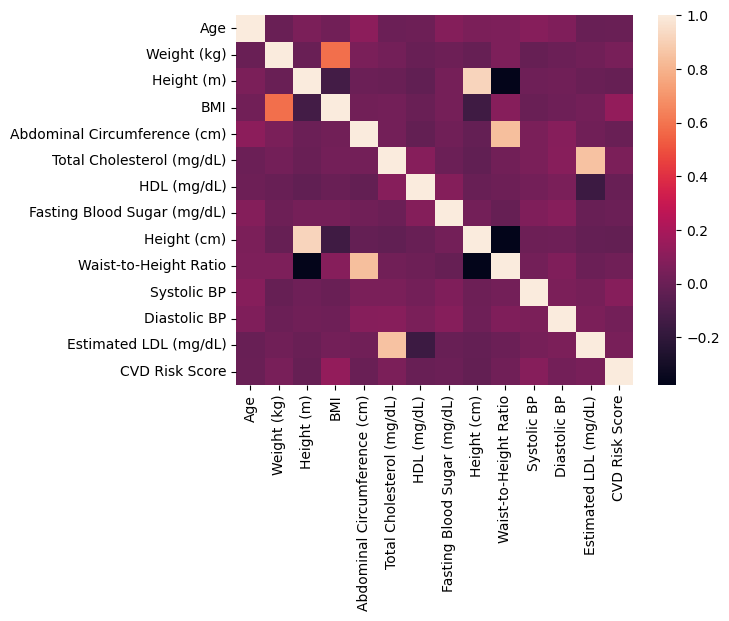

In [201]:
print("\n\n◉ HEATMAP PARA VER CORRELACIÓN ENTRE VARIABLES:\n")
sns.heatmap(df.corr(numeric_only=True))

### Unicidad de datos

In [202]:
print("\n\n◉ VERIFICAMOS LOS REGISTROS DUPLICADOS:\n")
df.duplicated(keep  = False).sum()
df[df.duplicated(keep = False)]



◉ VERIFICAMOS LOS REGISTROS DUPLICADOS:



,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
10,oSqq7069,18 Jun 23,F,38.0,68.516,1.929,39.967,96.957,105/84,241.000,...,Moderate,Y,192.936,0.503,105.0,84.0,Hypertension Stage 1,159.0,18.063,HIGH
14,gBFe4249,04/02/2020,F,52.0,89.700,1.880,25.400,107.500,145/92,142.000,...,Low,Y,188.000,0.572,145.0,92.0,Hypertension Stage 2,42.0,17.170,HIGH
17,AhYt1346,09-28-2020,M,41.0,71.300,1.730,23.800,107.900,139/61,253.000,...,Low,Y,173.000,NaN,139.0,NaN,Hypertension Stage 1,146.0,16.770,HIGH
29,RlsB8509,29/08/2020,F,55.0,79.700,1.780,25.200,86.900,140/62,248.000,...,Moderate,Y,178.000,0.488,140.0,62.0,Hypertension Stage 2,182.0,19.000,HIGH
31,RwGu5647,"May 03, 2020",M,42.0,51.095,1.521,20.190,72.274,159/91,296.000,...,Moderate,N,152.080,0.259,159.0,91.0,Hypertension Stage 2,211.0,17.908,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,KiRC8867,20/12/2024,M,46.0,90.748,1.705,30.866,108.768,105/113,198.000,...,Moderate,N,170.518,0.638,105.0,113.0,Hypertension Stage 2,117.0,15.383,INTERMEDIARY
1614,XUjh9519,2022-08-15,F,55.0,73.500,1.880,20.800,82.700,144/72,21.662,...,Low,Y,188.000,0.440,144.0,72.0,Hypertension Stage 2,100.0,16.680,HIGH
1624,rZFB5714,05 Sep 21,M,NaN,55.600,1.830,16.600,104.800,126/95,289.000,...,High,N,183.000,0.573,126.0,95.0,Hypertension Stage 2,201.0,15.400,INTERMEDIARY
1633,gBFe4249,04/02/2020,F,52.0,89.700,1.880,25.400,107.500,145/92,142.000,...,Low,Y,188.000,0.572,145.0,92.0,Hypertension Stage 2,42.0,17.170,HIGH


In [203]:
print("\n\n◉ VERIFICAMOS LOS PACIENTES CON REGISTROS DUPLICADOS:\n")

tabla = (
    df[df["Patient ID"].duplicated(keep=False)]
    .copy()
    .assign(repeticiones=df.groupby("Patient ID")["Patient ID"].transform("size"))
    .sort_values(["repeticiones", "Patient ID"], ascending=[False, True])
    
)

tabla



◉ VERIFICAMOS LOS PACIENTES CON REGISTROS DUPLICADOS:



,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level,repeticiones
17,AhYt1346,09-28-2020,M,41.0,71.300,1.730,23.800,107.9,139/61,253.0,...,Y,173.000,NaN,139.0,NaN,Hypertension Stage 1,146.0,16.770,HIGH,3
1227,AhYt1346,09-28-2020,M,41.0,71.300,1.730,23.800,107.9,139/61,253.0,...,Y,173.000,NaN,139.0,NaN,Hypertension Stage 1,146.0,-13.090,HIGH,3
1584,AhYt1346,09-28-2020,M,41.0,71.300,1.730,23.800,107.9,139/61,253.0,...,Y,173.000,NaN,139.0,NaN,Hypertension Stage 1,146.0,16.770,HIGH,3
130,BQvQ6431,09/11/2020,M,33.0,118.300,1.690,41.400,72.1,116/93,171.0,...,N,210.554,0.427,116.0,93.0,Hypertension Stage 2,97.0,17.500,LOW,3
1469,BQvQ6431,09/11/2020,M,33.0,118.300,1.690,41.400,72.1,116/93,171.0,...,N,210.554,0.427,116.0,93.0,Hypertension Stage 2,97.0,29.833,LOW,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,yvsn3005,28 Oct 20,F,60.0,54.300,1.810,16.600,99.1,133/65,187.0,...,N,181.000,0.548,133.0,65.0,Hypertension Stage 1,79.0,15.710,INTERMEDIARY,2
95,zcgB3048,12/06/2020,M,38.0,60.436,1.506,20.269,79.7,168/63,119.0,...,N,150.616,0.529,168.0,63.0,Hypertension Stage 2,43.0,14.834,HIGH,2
375,zcgB3048,12/06/2020,M,38.0,60.436,1.506,20.269,79.7,168/63,119.0,...,N,150.616,0.529,168.0,63.0,Hypertension Stage 2,43.0,14.834,HIGH,2
799,zxhX5525,"November 13, 2021",M,26.0,58.953,1.688,25.286,NaN,110/114,258.0,...,Y,168.763,0.455,110.0,114.0,Hypertension Stage 2,170.0,15.717,HIGH,2




◉ HISTOGRAMA PARA VER APROXIMADAMENTE VALORES ATÍPICOS



<Axes: >

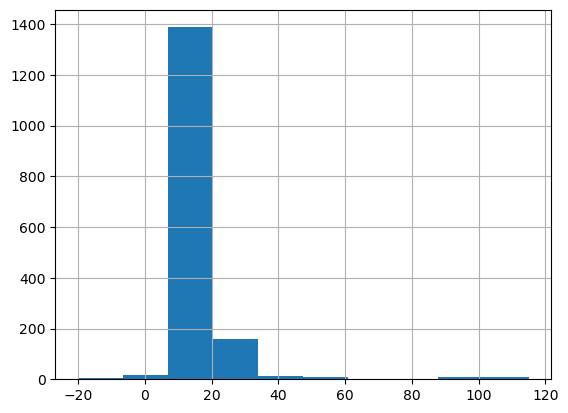

In [204]:
print("\n\n◉ HISTOGRAMA PARA VER APROXIMADAMENTE VALORES ATÍPICOS\n")
df["CVD Risk Score"].hist()

### CONCLUSIÓNES INICIALES:

1. Respecto a la COMPLETITUD podemos notar que hay una gran cantidad de registros que tienen valores nulos en algunos de sus componentes. Aunque todos son menores al 5%, notamos que al eliminar todos los registros con valores nulos se eliminan casi el 50% de los datos por lo que esta no sería una solución óptima.

2. Tambien notamos que entre la mayoría de las variables no hay correlación, sin embargo hay 3 relaciones específicas que sí es necesario tomar en cuenta:
    
    a. BMI tiene una alta correlacion con Weight (Kg)
    
    b. Waist-to-Height Ratio tiene una alta correlacion con Abdominal Circumference
    
    c. Total Cholesterol tiene una alta correlación con Estimated LDL

3. Respecto a la UNICIDAD notamos que existe un gran número de registros duplicados y especificamente pacientes que tienen más de una vez un registro con exactamente los mismos datos, incluso en fecha, por lo que podemos prescindir de ellos.

# 3. Limpieza y preparación de datos:

Con base en los hallazgos del análisis anterior vamos a modificar los datos para luego proceder al modelado.

Se encontraron 434 pacientes con datos duplicados, por lo que decidimos eliminarlos. **Revisando de nuevo encontramos estos pacientes duplicados tienen los mismos datos a excepcion del CVD Risk Score, por lo que asumimos que son multiples mediciones que se hicieron el mismo dia y consideramos más optimo dejar aquella que resultó con un puntaje mayor para registrar al paciente bajo el riesgo maximo detectado.**
 Vamos a eliminar los duplicados antes de realizar los modelos con pipeline, para no desalinear valores de X y Y.

Tambien notamos que en la mayoría de variables hay entre un 1% y 5% de datos nulos, sin embargo al hacer la prueba de eliminar estos registros en su totalidad se elimina casi la mitad del dataframe por lo que no es óptimo.

Los únicos registros que decidimos eliminar son aquellos que tenian la variable objetivo nula porque imputar estos datos puede dar lugar a sesgos, además son solo 29 de los 1639 registros, lo que no es una reducción importante de datos y podemos prescindir de ellos.

Tambien decidimos preparar una función para el pipeline que eliminará las columnas **Patient ID, Date of Service y Blood Pressure (mmHg)**, ya que las 2 primeras no son útiles para los calculos y Blood Pressure es un dato reduntante que está dado por las columnas **Systolic BP y Diastolic BP**

Para el resto de valores nulos se harán imputaciones con enfoques distintos para cada modelo.

Por último, notamos por el histograma que hay una cantidad muy pequeña de valores atípicos que se encuentran muy a los extremos lo que podría dañar la regresión lineal. Por lo que se trabajará mas adelante de forma distinta en cada modelo.

In [205]:
n_before = df.shape[0]
df["Date of Service"] = pd.to_datetime(df["Date of Service"], errors="coerce")
df = df.sort_values(["Patient ID", "Date of Service"])
df = df.drop_duplicates(subset="Patient ID", keep="last")
n_after = df.shape[0]
print(f"Duplicados eliminados: {n_before - n_after} (quedan {n_after})")

Duplicados eliminados: 263 (quedan 1376)


In [206]:

Q1 = df["CVD Risk Score"].quantile(0.05)
Q3 = df["CVD Risk Score"].quantile(0.90)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df["CVD Risk Score"] >= lower) & (df["CVD Risk Score"] <= upper)]

In [207]:
target = "CVD Risk Score"
print(f"ANTES - Registros con Risk Score nulos en df: {df[target].isnull().sum()}")
print(f"ANTES - Registros con Risk Score nulos en df2: {df2[target].isnull().sum()}")

target = "CVD Risk Score"
df = df.dropna(subset=[target])
df2 = df2.dropna(subset=[target])

print(f"DESPUES - Registros con Risk Score nulos en df: {df[target].isnull().sum()}")
print(f"DESPUES - Registros con Risk Score nulos en df2: {df2[target].isnull().sum()}")

ANTES - Registros con Risk Score nulos en df: 0
ANTES - Registros con Risk Score nulos en df2: 29
DESPUES - Registros con Risk Score nulos en df: 0
DESPUES - Registros con Risk Score nulos en df2: 0


In [208]:
#FUNCION DE ELIMINAR COLUMNAS ESPECÍFICAS PARA USO POSTERIOR EN PIPELINE

columnas_drop = ["Patient ID", "Date of Service", 
                "Blood Pressure (mmHg)"]
def drop(df):
    return df.drop(columns=columnas_drop, errors="ignore")

dropper = FunctionTransformer(drop, validate=False)

## 4. Construcción de modelos de regresión lineal

Ahora construiremos los modelos de regresión lineal solicitados.

### 4.1 Modelo 1

CVD Risk Score tiene valores que se comportan como outliers, con un minimo muy bajo y un maximo muy alto. Esto no es posible, ya que el CVD Risk Score es un porcentaje que representa la probabilidad de que una persona desarrolle una enfermedad cardiovascular en los próximos 10 años, por lo que su valor debe ser entre 0 y 100 por lo tanto vamos a corregir estos valores eliminando valores que se encuentran en antes de percentil 5 y despues del 95 que fue lo que se consideró que eliminó mas datos atipicos sin perjudicar el dataframe.

### Validez de datos
Observando algunos datos estadisticos del dataframe encontramos algunos datos que no son validos. Por ejemplo, el colesterol total tiene un min = - 1.256, pasaremos este valor a positivo con valor absoluto, por otra parte, el LDL estimado tiene min= -92.055. Haremos lo mismo, pondremos el absoluto de estos valores. Luego los utilizaremos en el pipeline.

In [209]:
def limpiar_colesterol(df):
    df["Total Cholesterol (mg/dL)"] = df["Total Cholesterol (mg/dL)"].abs()
    return df

def limpiar_ldl(df):
    df["Estimated LDL (mg/dL)"] = df["Estimated LDL (mg/dL)"].abs()
    return df

limpieza_colesterol = FunctionTransformer(limpiar_colesterol)
limpieza_ldl = FunctionTransformer(limpiar_ldl)

Podemos separar ahora la columna Blood Pressure y reemplazar los datos de Systolic Bp o Diastolic BP donde estan esten vacias.

In [210]:
def separar_presion(df):
    df = df.copy()
    if "Blood Pressure (mmHg)" in df.columns:
        bp = df["Blood Pressure (mmHg)"].str.extract(r'(\d+)/(\d+)')
        
        df["Systolic BP"] = bp[0].astype(float)
        df["Diastolic BP"] = bp[1].astype(float)
        
    return df

separacion_presion = FunctionTransformer(separar_presion)                  

Vamos a crear un pipeline de limpieza de datos para poder aplicar las mismas transformaciones a los datos de entrenamiento y prueba, esto es importante para evitar sesgos y asegurar que el modelo se entrene con datos limpios y consistentes.

In [211]:
target = "CVD Risk Score"
X = df.drop(columns=[target])
y = df[target]

Luego se dividie el conjunto de datos en entrenamiento y prueba, con el valor semilla que nos solicitaron de 42 y un porcentaje de 25% para el conjunto de prueba.

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Por el heatmap notamos que la mayoria de los datos no están correlacionados excepto por **Abdominal Circunference con Waist-to-Height Ratio** y **Total Cholesterol con Estimated LDL (mg/dL)**. Por lo que imputaremos los datos nulos de estas variables usando el método de varialbes correlacionadas.

In [213]:
def imputar_total_cholesterol_con_ldl(df):
    y = "Total Cholesterol (mg/dL)"
    x = "Estimated LDL (mg/dL)"

    k = (df[y] / df[x]).dropna().median()
    df = df.fillna({y: k * df[x]})
    df[y] = df[y].round()
    return df

chol_imputer = FunctionTransformer(imputar_total_cholesterol_con_ldl, validate=False)

In [214]:
def imputar_waist_to_height_ratio_con_circ(df):
    ratio = "Waist-to-Height Ratio"
    circ = "Abdominal Circumference (cm)"
    k = (df[ratio] / df[circ]).dropna().median()
    df = df.fillna({ratio: k * df[circ]})
    df[ratio] = df[ratio].round()
    return df
waist_height_imputer = FunctionTransformer(imputar_waist_to_height_ratio_con_circ, validate=False)

Ahora vamos a clasificarlas variables numericas y categoricas, cada una va a tener una entrada en el pipline según su clasificación.

In [215]:
numeric_features = [
    "Age", "Weight (kg)", "Height (m)", "BMI", "Height (cm)",
    "Abdominal Circumference (cm)", "Total Cholesterol (mg/dL)",
    "HDL (mg/dL)", "Fasting Blood Sugar (mg/dL)",
    "Waist-to-Height Ratio", "Systolic BP", "Diastolic BP",
    "Estimated LDL (mg/dL)",
]

numeric_scaled_features = numeric_features 

ordinal_features = ["Physical Activity Level", "Blood Pressure Category", 
                    "CVD Risk Level"]

categorical_features = [
    "Sex", "Smoking Status", "Diabetes Status",
    "Family History of CVD",
]

Ahora vamos hacer las transformaciones necesarias para el modelo de regresion lineal, en este caso vamos hacer el tratamiento de valores faltantes imputando el resto de los datos por la mediana.

In [216]:
numeric_scaled_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", MinMaxScaler()),
    ]
)

Ahora vamos hacer la transformación de las variables categorcias, si hay boolean con one-hot encoding pasamos estos valores a binarios, y si hay variables categoricas con mas de dos categorias con one-hot los pasamos a binarios.
De la misma manera, para las variables ordinales vamos a usar ordinal encoding, ya que estas variables tienen un orden natural y el modelo de regresion lineal puede beneficiarse de esta información.

In [217]:
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", drop="if_binary")),
])

ordinal_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    (
        "ordinal",
        OrdinalEncoder(
            categories=[
                ["Low", "Moderate", "High"],
                ["Normal", "Elevated", "Hypertension Stage 1", "Hypertension Stage 2"],
                ["LOW", "INTERMEDIARY", "HIGH"]
            ],
            handle_unknown="use_encoded_value",
            unknown_value=np.nan,
        ),
    ),
    ("imputer_after", SimpleImputer(strategy="most_frequent")),
])

Ahora con ColumnTransformer vamos aplicar las transformaciones para cada tipo de variable, asi preprocesamos en un bloque las tres variables ordinales , numericas y categoricas.

In [218]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num_scaled", numeric_scaled_transformer, numeric_scaled_features),
        ("ord", ordinal_transformer, ordinal_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

Finalmente definimos todo el pipeline integrando las transformaciones anteriores.

In [219]:
pipeline_regresion = Pipeline(steps=[
    ("separacion_presion", separacion_presion),
    ("dropper", dropper), 
    ("limpiar_colesterol", limpieza_colesterol),
    ("limpiar_ldl", limpieza_ldl),
    ("imputacion_chol", chol_imputer),
    ("imputacion_wthr", waist_height_imputer),
    ("preprocessor", preprocessor),
])

In [220]:
from sklearn import set_config
set_config(display="diagram")

pipeline_regresion

Pipeline(steps=[('separacion_presion',
                 FunctionTransformer(func=<function separar_presion at 0x0000026382878B80>)),
                ('dropper',
                 FunctionTransformer(func=<function drop at 0x00000263828A7040>)),
                ('limpiar_colesterol',
                 FunctionTransformer(func=<function limpiar_colesterol at 0x0000026382953C10>)),
                ('limpiar_ldl',
                 FunctionTransformer(func=<function limpiar_ldl at 0x0000...
                                                                                  unknown_value=nan)),
                                                                  ('imputer_after',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Physical Activity Level',
                                                   'Blood Pressure Category',
                                                   'CVD Risk Level']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Sex', 'Smoking Status',
                                                   'Diabetes Status',
                                                   'Family History of '
                                                   'CVD'])]))])

Lueog ajustamos el pipeline a X_train para transformar este conjunto de datos, para ello se crea otra variable para no afectar el dataframe original y transformamos los numpy array generados en la transformación one-hot a un dataframe

In [221]:
Xt_train = pipeline_regresion.fit_transform(X_train)

feature_names = pipeline_regresion.named_steps["preprocessor"].get_feature_names_out()
Xt_train_df = pd.DataFrame(
    Xt_train.toarray() if hasattr(Xt_train, "toarray") else Xt_train,
    columns=feature_names,
    index=X_train.index
)

Por ultimo entrenamos este primer modelo creado con el objeto de la clase LinearRegression con los datos de entrenamiento.

In [222]:
Modelo = LinearRegression()

In [223]:
Modelo.fit(Xt_train_df, y_train)

LinearRegression()

In [224]:
y_train_pred = Modelo.predict(Xt_train_df)

**Con esto, en las secciones 5, 6 y 7 ya podremos hacer las evaluaciones respectivas y la comparacion de los modelos.**

### 4.2 Modelo 2

Tras hacer varias pruebas y analizar el dataframe, notamos que el CVD Risk Score presenta datos atípicos que no tienen sentido conforme a lo que evalua. Es una probabilidad, va de 0 a 100 por lo que no pueden haber negativos y ni valores por encima de 100, por lo que buscaremos filtrar estos datos.

In [225]:
Q1 = df2["CVD Risk Score"].quantile(0.12)
Q3 = df2["CVD Risk Score"].quantile(0.85)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df2_filtrada = df2[(df2["CVD Risk Score"] >= lower) & (df2["CVD Risk Score"] <= upper)]

print("Tamaño antes:", df2.shape)
print("Tamaño después:", df2_filtrada.shape)


Tamaño antes: (1610, 24)
Tamaño después: (1547, 24)


Como se puede observar eliminando los datos previos al percentil 12 y posteriores al percentil 88 se eliminan unicamente 42 registros que es una cantidad bastante baja de la cual se puede prescindir. A continuación está una nueva gráfica que muestra los valores de CVD Risk Score con los valores atípicos descartados en su mayoría.

<Axes: >

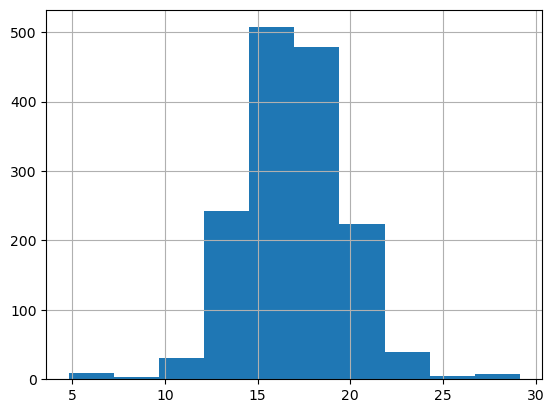

In [226]:
df2_filtrada["CVD Risk Score"].hist()

In [227]:
target = "CVD Risk Score"
X2 = df.drop(columns=[target])
y2 = df[target]

In [228]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, random_state=42)

En el dataset existen dos columnas que representan la altura: una en centímetros Height (cm) y otra en metros Height (m), como contienen la misma información, decidimos eliminar una de las columnas en este caso la de metros. 
Tambien nos parece apropiado eliminar la columna **CVD Risk Level** porque es un dato derivado de **CVD Risk Score** que no aporta informacion nueva y podria sesgar el modelo por uan correlacion entre estas, lo que queremos es que el CVD Risk Score se prediga a partir de las otras caracteristicas clinicas tomadas.

Ademas iremos preparando las funciones para agregarlas al pipeline que crearemos para este modelo.

In [229]:
def drop_unwanted_columns(df):
    return df.drop(columns=["Height (m)", "CVD Risk Level"], errors="ignore")

drop_columns_transformer = FunctionTransformer(drop_unwanted_columns, validate=False)

Preferimos en este caso mapear las columnas **Smoking Status, Diabetes Status y Family History of CVD** para pasar sus datos de "Y" a 1 y de "N" a 0 para trabajar unicamente con variables numéricas

In [230]:
def map_binary(df):
    mapping = {"Y": 1, "N": 0}
    for col in ["Smoking Status", "Diabetes Status", "Family History of CVD"]:
        if col in df.columns:
            df[col] = df[col].map(mapping)
    return df

map_binary_transformer = FunctionTransformer(map_binary, validate=False)

In [231]:
def map_sex(df):
    if "Sex" in df.columns:
        df["Sex"] = df["Sex"].map({"M": 1, "F": 0})
    return df

map_sex_transformer = FunctionTransformer(map_sex, validate=False)

In [232]:
def imputar_mediana(df):
    columnas_numericas = df.select_dtypes(include=["float64", "int64"]).columns
    for col in columnas_numericas:
        df[col].fillna(df[col].median(), inplace=True)
    return df

imputacion_mediana_transformer = FunctionTransformer(imputar_mediana, validate=False)

In [233]:
numeric_scaled_transformer2 = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),  # Agregamos imputer aquí para seguridad
        ("scaler", MinMaxScaler()),
    ]
)

In [234]:
columnas_numericas2 = [
    "Age", "Weight (kg)", "BMI", "Height (cm)",
    "Abdominal Circumference (cm)", "Total Cholesterol (mg/dL)",
    "HDL (mg/dL)", "Fasting Blood Sugar (mg/dL)",
    "Waist-to-Height Ratio", "Systolic BP", "Diastolic BP",
    "Estimated LDL (mg/dL)",
]
# Asegurarnos de que no estén las columnas que vamos a eliminar
columnas_numericas2 = [col for col in columnas_numericas2 if col not in ["Height (m)", "CVD Risk Level"]]

ordinal_features2 = ["Physical Activity Level"]

In [235]:
ordinal_transformer2 = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    (
        "ordinal",
        OrdinalEncoder(
            categories=[
                ["Low", "Moderate", "High"]
            ],
            handle_unknown="use_encoded_value",
            unknown_value=np.nan,
        ),
    ),
    ("imputer_after", SimpleImputer(strategy="most_frequent")),
])

In [236]:
preprocessor2 = ColumnTransformer(
    transformers=[
        ("num_scaled", numeric_scaled_transformer2, columnas_numericas2),
        ("ord", ordinal_transformer2, ordinal_features2),
    ]
)

In [237]:
pipeline2 = Pipeline(steps=[
    ("drop_unwanted_columns", dropper),
    ("drop_columns_extra", drop_columns_transformer),
    ("map_binary", map_binary_transformer),
    ("map_sex", map_sex_transformer),
    ("imputar_mediana", imputacion_mediana_transformer),
    ("preprocessor2", preprocessor2)
])


In [238]:
from sklearn import set_config
set_config(display="diagram")

In [239]:
pipeline2

Pipeline(steps=[('drop_unwanted_columns',
                 FunctionTransformer(func=<function drop at 0x00000263828A7040>)),
                ('drop_columns_extra',
                 FunctionTransformer(func=<function drop_unwanted_columns at 0x0000026383D5B310>)),
                ('map_binary',
                 FunctionTransformer(func=<function map_binary at 0x0000026383D5B820>)),
                ('map_sex',
                 FunctionTransformer(func=<function map_sex at 0x00000263...
                                                   'Waist-to-Height Ratio',
                                                   'Systolic BP',
                                                   'Diastolic BP',
                                                   'Estimated LDL (mg/dL)']),
                                                 ('ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(categories=[['Low',
                                                                                               'Moderate',
                                                                                               'High']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('imputer_after',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Physical Activity '
                                                   'Level'])]))])

In [240]:
Xt_train = pipeline2.fit_transform(X_train)

C:\Users\luisf\AppData\Local\Temp\ipykernel_21924\3312901761.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\luisf\AppData\Local\Temp\ipykernel_21924\3312901761.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [241]:
# Obtenemos los nombres de las características del paso 'preprocessor2'
feature_names = pipeline2.named_steps["preprocessor2"].get_feature_names_out()

Xt_train_df = pd.DataFrame(
    Xt_train.toarray() if hasattr(Xt_train, "toarray") else Xt_train,
    columns=feature_names,
    index=X_train.index
)

Xt_train_df.head()

,num_scaled__Age,num_scaled__Weight (kg),num_scaled__BMI,num_scaled__Height (cm),num_scaled__Abdominal Circumference (cm),num_scaled__Total Cholesterol (mg/dL),num_scaled__HDL (mg/dL),num_scaled__Fasting Blood Sugar (mg/dL),num_scaled__Waist-to-Height Ratio,num_scaled__Systolic BP,num_scaled__Diastolic BP,num_scaled__Estimated LDL (mg/dL),ord__Physical Activity Level
867,0.332289,0.531034,0.424606,0.686839,0.251838,0.388324,0.852415,0.482940,0.221591,0.508764,0.470546,0.330915,0.0
1381,0.344337,0.708644,0.623740,0.596975,0.678134,0.571817,0.693478,0.585699,0.630682,0.468110,0.320222,0.539184,1.0
283,0.260000,0.515166,0.407813,0.478613,0.236756,0.367648,0.386956,0.287207,0.272727,0.332595,0.460525,0.411772,0.0
1613,0.223855,0.613980,0.358133,0.416273,0.479837,0.667440,0.886473,0.727605,0.500000,0.420680,0.831326,0.588188,1.0
4,0.500964,0.612266,0.597052,0.494274,0.658548,0.538220,0.545893,0.644418,0.664773,0.481661,0.340265,0.539184,0.0


In [242]:
Modelo2 = LinearRegression()

In [243]:
Modelo2.fit(Xt_train_df, y_train)

LinearRegression()

In [244]:
y_train_pred2 = Modelo2.predict(Xt_train_df)

## 5. Evaluación cuantitativa - Comparación de modelos

Se comparan los dos mejores modelos utilizando:
- RMSE (Root Mean Squared Error)
- MAE (Mean Absolute Error)
- R² (Coeficiente de determinación)

Ahora vamos a validar el modelo evaluando su desempeño. Para ello calculamos el MAE, que mide el error promedio de las predicciones


## MODELO 1

In [245]:
mae_train = mean_absolute_error(y_train, y_train_pred)
print("MAE train: ", mae_train)

MAE train:  0.4581174846673159


In [246]:
rmse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(rmse_train)
print("RMSE train:", rmse_train)

RMSE train: 1.3266849415195463


In [247]:
r2_train = r2_score(y_train, y_train_pred)
print("R²   train:", r2_train)

R²   train: 0.7550437721603669


## MODELO 2

In [248]:
mae_train = mean_absolute_error(y_train, y_train_pred2)
print("MAE train: ", mae_train)

MAE train:  1.1640357102089873


In [249]:
rmse_train = mean_squared_error(y_train, y_train_pred2)
rmse_train = np.sqrt(rmse_train)
print("RMSE train:", rmse_train)

RMSE train: 1.6476805007046733


In [250]:
r2_train = r2_score(y_train, y_train_pred2)
print("R²   train:", r2_train)

R²   train: 0.6221678667206385


## 6. Evaluación cualitativa - Variables más importantes

Con base en el mejor modelo determinar las variables más importantes para la predicción.Recuerde validar los supuestos de la regresión lineal para esta etapa de interpretación de resultados.

# Comparación de modelos (Train y Test)

## 1) Métricas sobre *entrenamiento (train)*

| Métrica | Modelo 1 (train) | Modelo 2 (train) | Mejor en train |
|---|---:|---:|---|
| *MAE* | *0.4581174846673159* | 1.1640357102089873 | *Modelo 1* (menor) |
| *RMSE* | *1.3266849415195463* | 1.6476805007046733 | *Modelo 1* (menor) |
| *R²* | *0.7550437721603669* | 0.6221678667206385 | *Modelo 1* (mayor) |

### Conclusiones (train)
- *El Modelo 1 domina al Modelo 2 en las tres métricas*, lo que indica un ajuste mucho más preciso sobre los datos con los que fue entrenado.
- La mejora en *MAE* es especialmente marcada (*0.458 vs 1.164). Esto sugiere que, en promedio, el Modelo 1 comete errores absolutos mucho menores al predecir el *CVD Risk Score.
- El *RMSE* también es menor en el Modelo 1 (*1.327 vs 1.648), lo cual es clave porque el RMSE penaliza más los errores grandes: **Modelo 1 reduce mejor los “errores grandes”*.
- El *R²* del Modelo 1 es mayor (*0.755 vs 0.622), lo que significa que **explica una mayor proporción de la variabilidad* del riesgo cardiovascular en el conjunto de entrenamiento.
- *Advertencia importante:* estas métricas son *solo en train, así que **no garantizan* que el Modelo 1 generalice mejor. La decisión final para la entrega debe basarse en *test*.

---

## 2) Cómo calcular lo mismo en *test*
Ejecuta esto para *cada modelo* (ajusta nombres según tus variables):

```python
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# ===== MODELO 1 =====
y_test_pred_1 = modelo1.predict(X_test)   # o pipeline1.predict(X_test)
mae_test_1  = mean_absolute_error(y_test, y_test_pred_1)
rmse_test_1 = np.sqrt(mean_squared_error(y_test, y_test_pred_1))
r2_test_1   = r2_score(y_test, y_test_pred_1)

print("Modelo 1 - TEST | MAE:", mae_test_1, "| RMSE:", rmse_test_1, "| R2:", r2_test_1)

# ===== MODELO 2 =====
y_test_pred_2 = modelo2.predict(X_test)   # o pipeline2.predict(X_test)
mae_test_2  = mean_absolute_error(y_test, y_test_pred_2)
rmse_test_2 = np.sqrt(mean_squared_error(y_test, y_test_pred_2))
r2_test_2   = r2_score(y_test, y_test_pred_2)

print("Modelo 2 - TEST | MAE:", mae_test_2, "| RMSE:", rmse_test_2, "| R2:", r2_test_2)

In [251]:
print("Intercepto:", Modelo.intercept_)

Intercepto: 6.194710950795047


# 7 VALIDACION DE SUPUESTOS

 Verificación de supuestos

El componente de supuestos nos ayuda principalmente a interpretar los coeficientes. Recordemos que un modelo de regresión lineal tiene esta forma:

$$ y = {\beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2} + \beta_{3}x_{3} + \beta_{4}x_{4} + \beta_{5}x_{5}} $$

siendo $\beta_{0}$ el intercepto (bias) y $\beta_{1}$, $\beta_{2}$, $\beta_{3}$, $\beta_{4}$ y $\beta_{5}$ los coeficientes o parámetros correspondientes a las variables de entrada en el mismo orden.

Estos coeficientes nos dicen que tanto impactan las variables explicativas en la estimación del Precio. Para ello veamos los coeficientes que se obtuvieron del modelo:

In [255]:
feature_names = pipeline_regresion.named_steps["preprocessor"].get_feature_names_out()
feature_names = [
    name.replace("num_", "").replace("cat_", "")
    for name in feature_names
]
coef_df = pd.DataFrame({
    "Variable": feature_names,
    "Coeficiente": Modelo.coef_
})
coef_df

,Variable,Coeficiente
0,scaled__Age,0.239684
1,scaled__Weight (kg),1.080250
2,scaled__Height (m),-0.119465
3,scaled__BMI,8.063274
4,scaled__Height (cm),0.074042
5,scaled__Abdominal Circumference (cm),0.036422
6,scaled__Total Cholesterol (mg/dL),4.310191
7,scaled__HDL (mg/dL),0.508696
8,scaled__Fasting Blood Sugar (mg/dL),-0.249182
9,scaled__Waist-to-Height Ratio,0.066902


Multicolinealidad
La multicolinealidad ocurre cuando dos o más variables independientes están altamente correlacionadas. Aunque no constituye un supuesto fundamental de la regresión lineal, sí es una condición importante para la interpretación confiable de los coeficientes.

Dado que la multicolinealidad afecta principalmente la estabilidad e interpretación de los coeficientes, es necesario contar con un indicador que permita medirla de forma cuantitativa. Para ello se suele utiliza el Factor de Inflación de la Varianza (VIF, por sus siglas en inglés), el cual mide cuánto se incrementa la varianza de un coeficiente de regresión debido a la correlación con las demás variables independientes. Valores de VIF cercanos a 1 indican ausencia de multicolinealidad, mientras que valores altos sugieren una fuerte relación entre las variables y, por tanto, coeficientes menos confiables. De manera general, un VIF mayor o igual a 5 se considera una señal de multicolinealidad significativa.

$$
VIF = \frac{1}{1 - R^2}
$$

Tendremos un valor de *VIF* por cada una de las variables predictoras que, por ejemplo, se puede interpretar de la siguiente forma: 

* $VIF > 4$: Se tiene problema de Multicolinealidad

* $VIF <= 4$: No hay problema de Multicolinealidad

Para nuestro caso se tiene:

In [256]:
X_vif = Xt_train_df.select_dtypes(include="number").copy()
clean_columns = (
    X_vif.columns
         .str.replace("^num__", "", regex=True)
         .str.replace("^cat__", "", regex=True)
)
vif_values = []
with np.errstate(divide="ignore", invalid="ignore"):
    for i in range(X_vif.shape[1]):
        vif = variance_inflation_factor(X_vif.values, i)
        vif_values.append(vif)

vif_data = pd.DataFrame({
    "Variable": clean_columns,
    "VIF": vif_values
})
print(vif_data)

                                    Variable        VIF
0                            num_scaled__Age  11.537170
1                    num_scaled__Weight (kg)  18.403916
2                            num_scaled__BMI  18.244051
3                    num_scaled__Height (cm)  15.736444
4   num_scaled__Abdominal Circumference (cm)  48.940375
5      num_scaled__Total Cholesterol (mg/dL)  43.334733
6                    num_scaled__HDL (mg/dL)  13.127249
7    num_scaled__Fasting Blood Sugar (mg/dL)  11.312558
8          num_scaled__Waist-to-Height Ratio  52.448128
9                    num_scaled__Systolic BP  12.039594
10                  num_scaled__Diastolic BP  11.024217
11         num_scaled__Estimated LDL (mg/dL)  39.451735
12              ord__Physical Activity Level   2.556029


Normalidad de los errores

Esto supuesto nos dice que los errores del modelo, es decir la diferencia entre el valor real y el predicho, deberían seguir aproximadamente una distribución normal. Esto quiere decir que la mayoría de los errores deben ser pequeños y los errores muy grandes deben ser poco frecuentes y repartidos de forma simétrica. Cumplir con este supuesto nos permite hacer distintas pruebas sobre el modelo y sus coeficientes.

Existen distintas formas de verificar si el supuesto se cumple o no, uno de ellos es usar una prueba de normalidad, como la de Shapiro–Wilk.

In [257]:
# Residuales en train
residuales = np.array(y_train - y_train_pred)

estat, p_shapiro = shapiro(residuales)
print("Shapiro-Wilk p-value:", p_shapiro)

Shapiro-Wilk p-value: 1.5816277506675446e-49


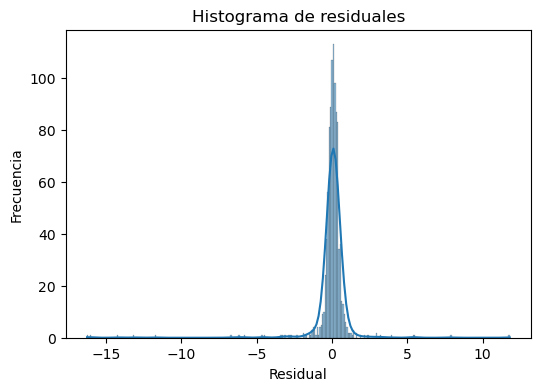

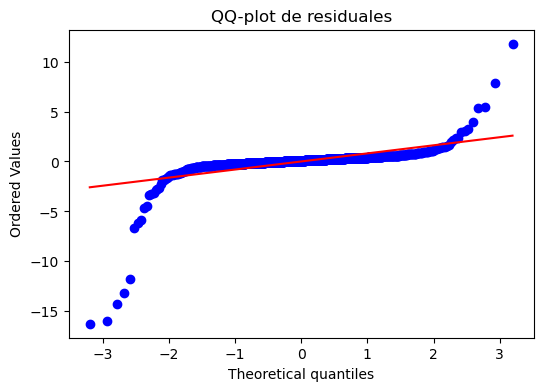

In [258]:
# Histograma
plt.figure(figsize=(6, 4))
sns.histplot(residuales, kde=True)
plt.title("Histograma de residuales")
plt.xlabel("Residual")
plt.ylabel("Frecuencia")
plt.show()

# 2. QQ-plot
plt.figure(figsize=(6, 4))
stats.probplot(residuales, dist="norm", plot=plt)
plt.title("QQ-plot de residuales")
plt.show()

Homecedasticidad

Este supuesto establece que los errores del modelo deben presentar una variabilidad aproximadamente constante para todos los niveles de las variables explicativas, es decir, que el modelo se equivoque de manera similar tanto en propiedades de bajo como de alto precio. Cuando este supuesto no se cumple, se presenta heterocedasticidad, lo que implica que los errores estándar de los coeficientes pueden estar mal estimados y, en consecuencia, las pruebas estadísticas t y F utilizadas para evaluar la significancia de las variables dejan de ser confiables. Una forma clásica de evaluar este supuesto es mediante la prueba de Breusch–Pagan.

In [259]:
X_num = Xt_train_df.select_dtypes(include="number").copy()
mask = np.isfinite(X_num).all(axis=1)
X_num_clean = X_num[mask]
resid_clean = residuales[mask]
X_num_const = sm.add_constant(X_num_clean)
bp_stat, bp_pvalue, _, _ = het_breuschpagan(resid_clean, X_num_const)

print("Estadístico Breusch-Pagan:", bp_stat)
print("p-value Breusch-Pagan   :", bp_pvalue)

Estadístico Breusch-Pagan: 13.100850563722693
p-value Breusch-Pagan   : 0.4400522249059141


Independencia de los errores

El supuesto de independencia dice que los errores del modelo no deberían estar conectados entre sí, basicamente que el error que comete el modelo en una observación no debería influir en el error de la siguiente.
En caso de que el supuesto no se cumpla, se tiene autocorrelación, que dice que los errores se mueven en grupo, haciendo que cualquier prueba estadística sea poco confiable.

Una forma de revisar el cumplimiento del supuesto es usando el estadístico de Durbin–Watson, que se comporta de esta forma:

$$0≤DW≤4$$

+ Si es $0$ o cercano, nos dice que hay problemas de autocorrelación positiva.
+ Si es $2$ significa que no hay autocorrelación (no hay problemas).
+ Si es $4$ o cercano, indica que hay problemas de autocorrelación negativa.

In [260]:
dw = durbin_watson(residuales)
print("Durbin-Watson:", dw)

Durbin-Watson: 2.0340729346579143


 Gráficas para ver de manera visual la homocedasticidad e independencia de los residuos



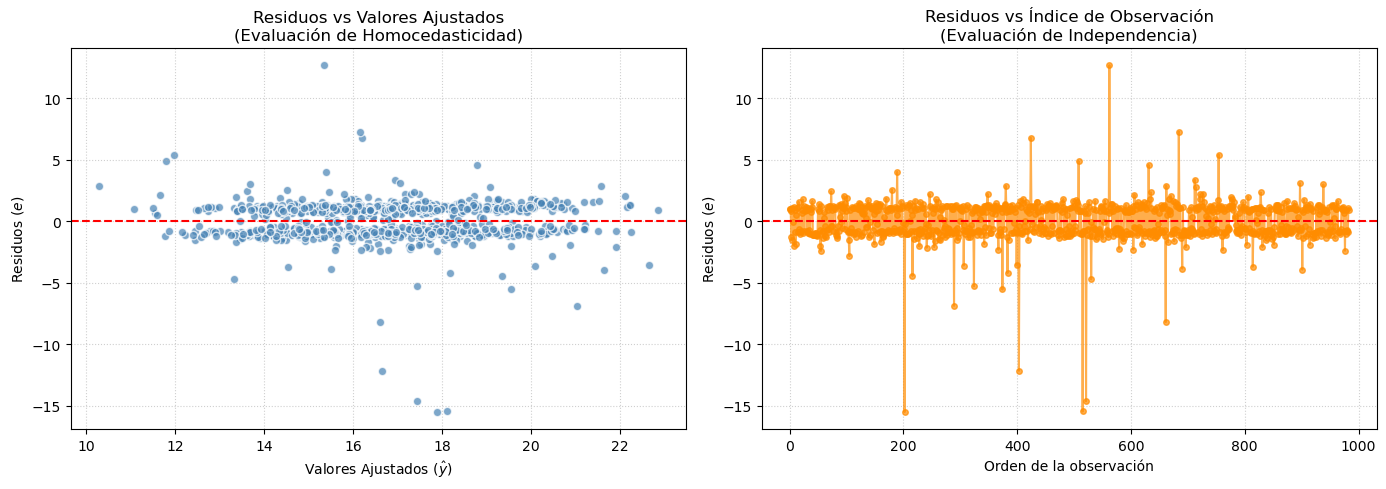

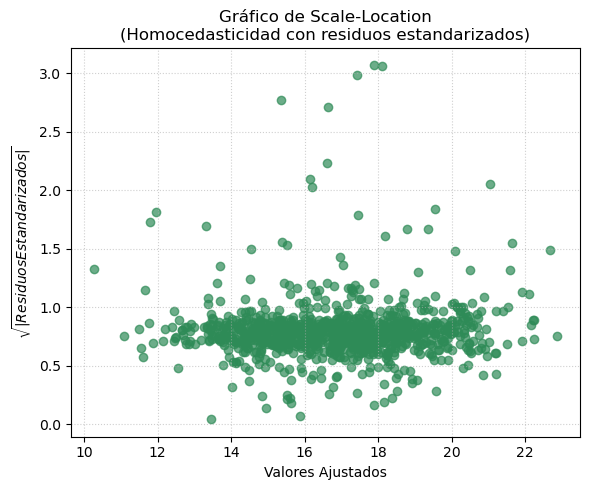

In [268]:
# ----------------------------------------------
# 1. Limpiar nombres de columnas para ols
# ----------------------------------------------
Xt_train_df_clean = Xt_train_df.copy()

# Reemplazar espacios, paréntesis, / y - por guion bajo
Xt_train_df_clean.columns = [
    c.replace(" ", "_")
     .replace("(", "")
     .replace(")", "")
     .replace("/", "_")
     .replace("-", "_")
    for c in Xt_train_df_clean.columns
]

# Renombrar variable objetivo
y_train_clean = y_train2.rename("CVD_Risk_Score")

# Crear dataframe combinado para statsmodels
df_graficas = Xt_train_df_clean.join(y_train_clean)

# ----------------------------------------------
# 2. Crear fórmula para ols
# ----------------------------------------------
nombres_x = " + ".join(Xt_train_df_clean.columns)
formula = f'CVD_Risk_Score ~ {nombres_x}'

# ----------------------------------------------
# 3. Ajustar modelo de regresión lineal
# ----------------------------------------------
from statsmodels.formula.api import ols

model = ols(formula, data=df_graficas).fit()
fitted_values = model.fittedvalues
residuals = model.resid

# ----------------------------------------------
# 4. Gráficas de diagnóstico
# ----------------------------------------------
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14, 5))

# 4a. Residuos vs valores ajustados (homocedasticidad)
plt.subplot(1, 2, 1)
plt.scatter(fitted_values, residuals, alpha=0.7, color='steelblue', edgecolors='white')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuos vs Valores Ajustados\n(Evaluación de Homocedasticidad)')
plt.xlabel('Valores Ajustados ($\hat{y}$)')
plt.ylabel('Residuos ($e$)')
plt.grid(True, linestyle=':', alpha=0.6)

# 4b. Residuos vs índice de observación (independencia)
plt.subplot(1, 2, 2)
plt.plot(range(len(residuals)), residuals, marker='o', linestyle='-', markersize=4, alpha=0.7, color='darkorange')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuos vs Índice de Observación\n(Evaluación de Independencia)')
plt.xlabel('Orden de la observación')
plt.ylabel('Residuos ($e$)')
plt.grid(True, linestyle=':', alpha=0.6)

plt.tight_layout()
plt.show()

# 4c. Scale-Location plot (residuos estandarizados vs valores ajustados)
plt.figure(figsize=(6, 5))
standardized_residuals = model.get_influence().resid_studentized_internal
plt.scatter(fitted_values, np.sqrt(np.abs(standardized_residuals)), alpha=0.7, color='seagreen')
plt.title('Gráfico de Scale-Location\n(Homocedasticidad con residuos estandarizados)')
plt.xlabel('Valores Ajustados')
plt.ylabel('$\sqrt{|Residuos Estandarizados|}$')
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()


Linealidad

El supuesto de linealidad dice que la relación entre las variables explicativas y la media de Precio se puede describir razonablemente mediante una combinación lineal, es decir que cada variable aporta un efecto proporcional y más o menos constante sobre el precio cuando aumenta en una unidad, manteniendo las demás fijas.

Una forma de evaluar este supuesto es usar una prueba estadística como el test de Rainbow, que devuelve un estadístico y un p-value para comprobar si el modelo lineal se ajusta bien o si hay indicios de que la relación no es lineal.

In [263]:
X_sm = sm.add_constant(Xt_train_df)
modelo_sm = sm.OLS(y_train, X_sm).fit()

rainbow_stat, rainbow_pvalue = linear_rainbow(modelo_sm)

print("Estadístico Rainbow:", rainbow_stat)
print("p-value Rainbow    :", rainbow_pvalue)

Estadístico Rainbow: 0.5210474959185142
p-value Rainbow    : 0.9999999999994733
